<a href="https://colab.research.google.com/github/dribnet/clipit/blob/master/demos/PixelDrawer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

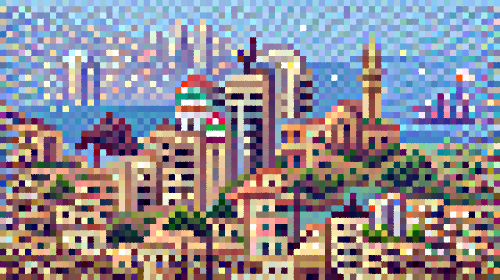
<br>
Beirut Skyline by <a href="https://twitter.com/gorillasu">Ahmad Moussa</a><br>
# CLIPIT PixelDraw demo

This version of the notebook is setup to easily change from VQGAN to PixelDraw to render the image.

In [1]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. For setup,
#@markdown **you need to run this cell,
#@markdown then choose Runtime -> Restart Runtime from the menu,
#@markdown and then run the cell again**. It should remind you to
#@markdown do this after the first run.

#@markdown Setup can take 5-10 minutes, but once it is complete it usually does not need to be repeated
#@markdown until you close the window.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

# https://stackoverflow.com/a/56727659/1010653

# Add a gpu check
# (this can get better over time)
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, THIS IS PROBABLY NOT ENOUGH <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured:
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/dribnet/clipit
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

GPU check: 16280 MiB available: this should be fine


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
100%|███████████████████████████████████████| 244M/244M [00:03<00:00, 64.4MiB/s]
100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 197MiB/s]
100%|███████████████████████████████████████| 335M/335M [00:05<00:00, 63.3MiB/s]


Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Beirut Skyline. #pixelart']
Using seed: 2808095713701073490


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


iter: 0, loss: 2.83455, losses: 1.01152, 0.911992, 0.911039


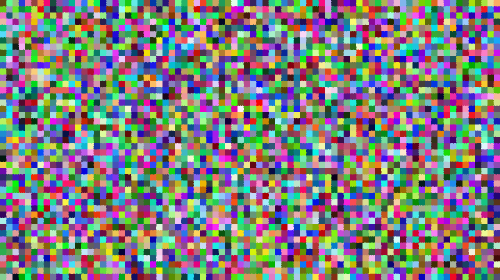

iter: 10, loss: 2.66744, losses: 0.966032, 0.850346, 0.851067
iter: 20, loss: 2.46586, losses: 0.920771, 0.765105, 0.779983


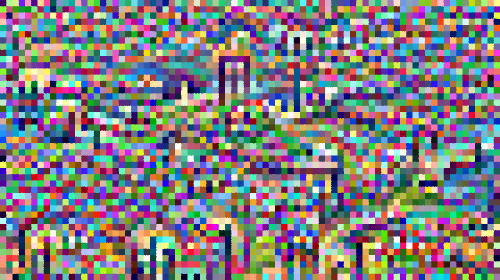

iter: 30, loss: 2.27527, losses: 0.847606, 0.713526, 0.714134
iter: 40, loss: 2.29182, losses: 0.854824, 0.713465, 0.723535


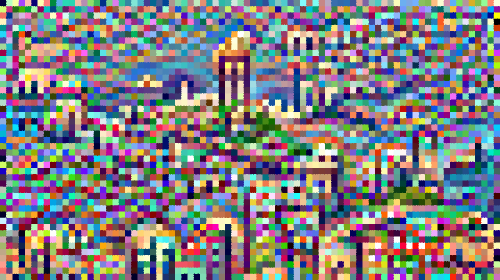

iter: 50, loss: 2.24998, losses: 0.83913, 0.698434, 0.712419
iter: 60, loss: 2.1771, losses: 0.807374, 0.682808, 0.686916


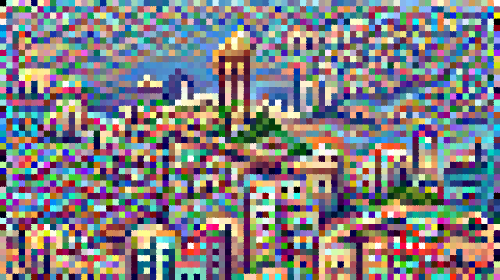

iter: 70, loss: 2.1905, losses: 0.815225, 0.686112, 0.689167
iter: 80, loss: 2.14938, losses: 0.794992, 0.679526, 0.674858


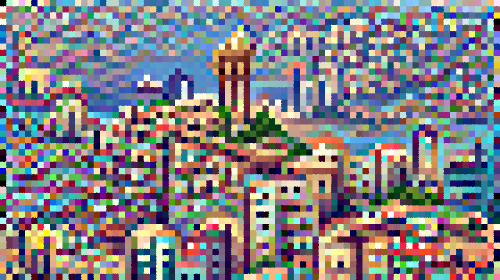

iter: 90, loss: 2.07364, losses: 0.764085, 0.657499, 0.652061
iter: 100, loss: 2.08543, losses: 0.767378, 0.663532, 0.654522


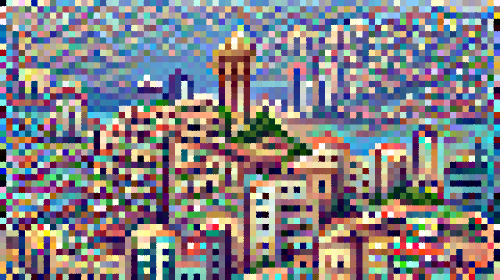

iter: 110, loss: 2.05673, losses: 0.760584, 0.65313, 0.643017
iter: 120, loss: 1.96483, losses: 0.709803, 0.635035, 0.619989


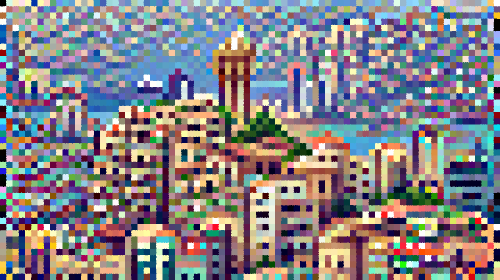

iter: 130, loss: 2.01659, losses: 0.739442, 0.644237, 0.632914
iter: 140, loss: 2.05686, losses: 0.755836, 0.654929, 0.6461


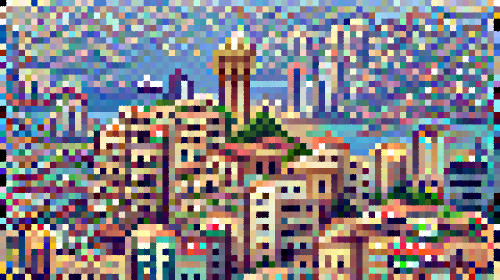

iter: 150, loss: 2.03429, losses: 0.742471, 0.650607, 0.641207
iter: 160, loss: 2.01152, losses: 0.733478, 0.645876, 0.63217


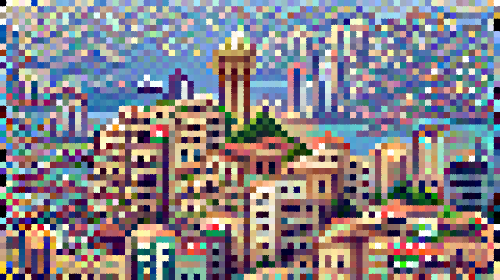

iter: 170, loss: 2.00994, losses: 0.731975, 0.647437, 0.630526
iter: 180, loss: 2.04646, losses: 0.744676, 0.657046, 0.644735


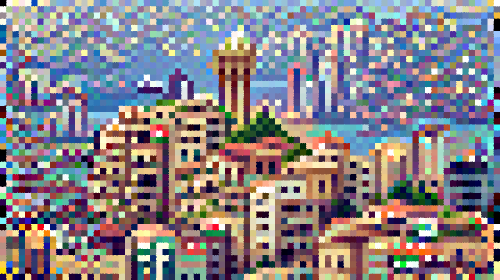

iter: 190, loss: 1.9273, losses: 0.689238, 0.626296, 0.611769
iter: 200, loss: 1.91632, losses: 0.688393, 0.622824, 0.605106


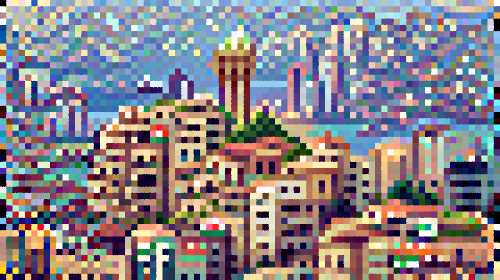

iter: 210, loss: 2.00895, losses: 0.729671, 0.645431, 0.633848
iter: 220, loss: 2.01175, losses: 0.725752, 0.652836, 0.633161


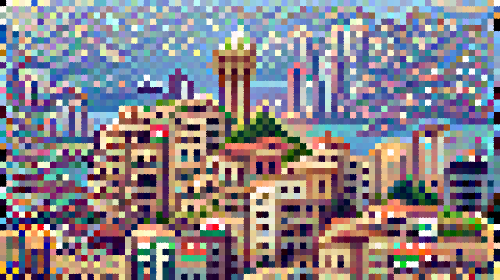

iter: 230, loss: 1.97676, losses: 0.713658, 0.639332, 0.623771
iter: 240, loss: 1.92954, losses: 0.693137, 0.627763, 0.60864


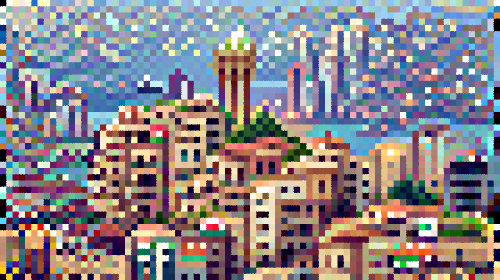

iter: 250, loss: 1.8958, losses: 0.677666, 0.616964, 0.601173
iter: 260, loss: 1.98019, losses: 0.718083, 0.637905, 0.624205


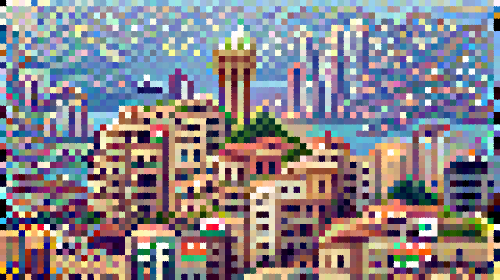

iter: 270, loss: 1.981, losses: 0.718194, 0.639376, 0.623427
iter: 280, loss: 1.99377, losses: 0.724325, 0.640103, 0.629344


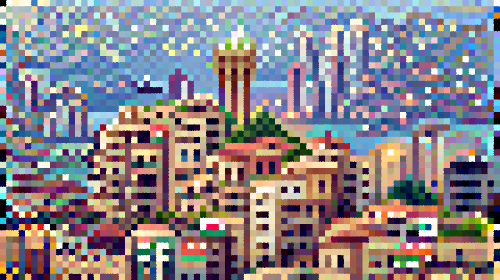

iter: 290, loss: 2.01561, losses: 0.731636, 0.64753, 0.63644
iter: 300, loss: 2.02012, losses: 0.733543, 0.645073, 0.6415


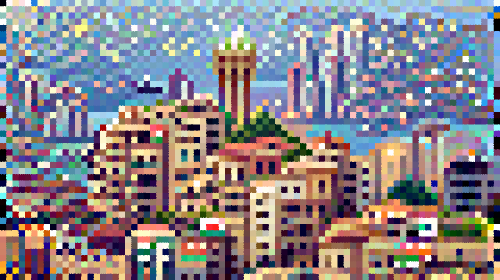

iter: 310, loss: 1.90654, losses: 0.684379, 0.618214, 0.603951
iter: 320, loss: 2.01184, losses: 0.731202, 0.647397, 0.633238


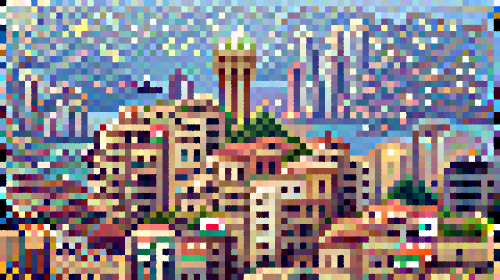

iter: 330, loss: 1.89499, losses: 0.676158, 0.62013, 0.598705
iter: 340, loss: 1.9986, losses: 0.725745, 0.64106, 0.631797


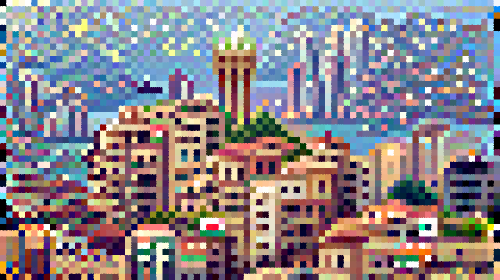

iter: 350, loss: 2.00051, losses: 0.720511, 0.645668, 0.634335
iter: 360, loss: 1.96399, losses: 0.711294, 0.633681, 0.619019


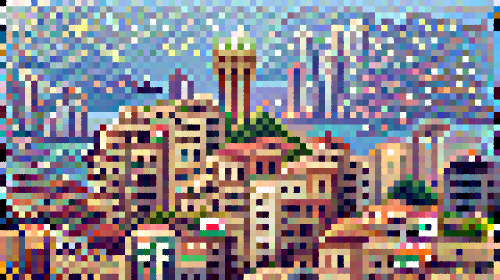

iter: 370, loss: 1.99669, losses: 0.724784, 0.642328, 0.629579
iter: 380, loss: 1.97708, losses: 0.712095, 0.638482, 0.626502


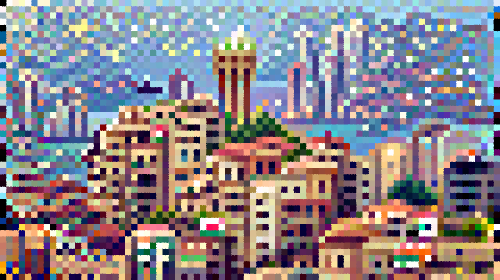

iter: 390, loss: 2.00451, losses: 0.73144, 0.641227, 0.631841
iter: 400, loss: 1.96421, losses: 0.709743, 0.633626, 0.620838


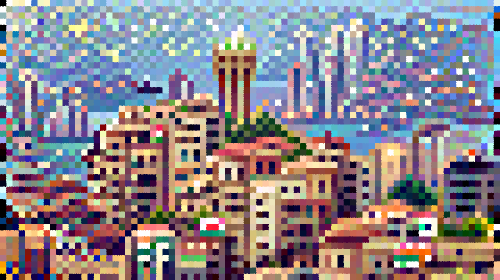

iter: 410, loss: 1.96254, losses: 0.709999, 0.631659, 0.620882
iter: 420, loss: 2.00069, losses: 0.723558, 0.642918, 0.634214


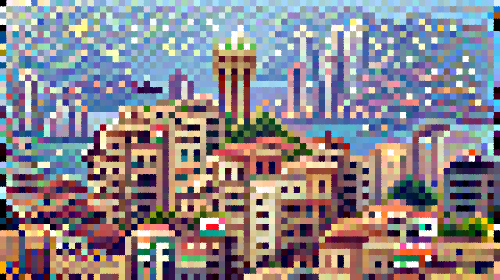

iter: 430, loss: 1.96573, losses: 0.712938, 0.634384, 0.618407
iter: 440, loss: 2.01819, losses: 0.73724, 0.644988, 0.635967


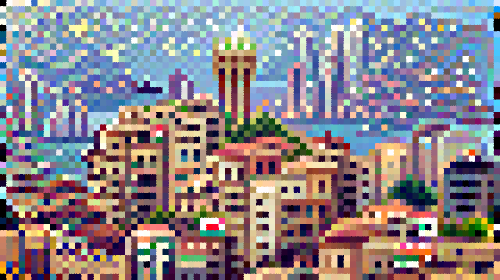

iter: 450, loss: 1.99476, losses: 0.723285, 0.642384, 0.629095
iter: 460, loss: 2.01032, losses: 0.725652, 0.647714, 0.636956


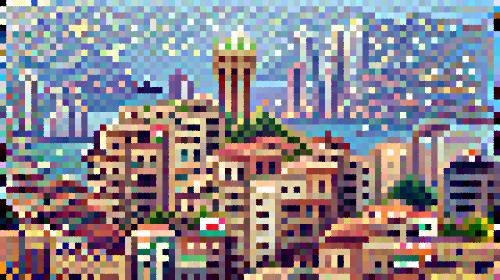

iter: 470, loss: 2.00447, losses: 0.727802, 0.645649, 0.631019
iter: 480, loss: 1.99955, losses: 0.727621, 0.640082, 0.631848


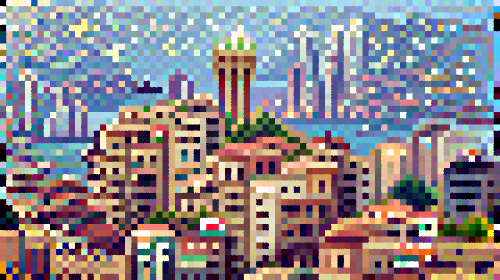

iter: 490, loss: 1.96081, losses: 0.708611, 0.633108, 0.619091
iter: 500, loss: 1.96429, losses: 0.712937, 0.634302, 0.617056


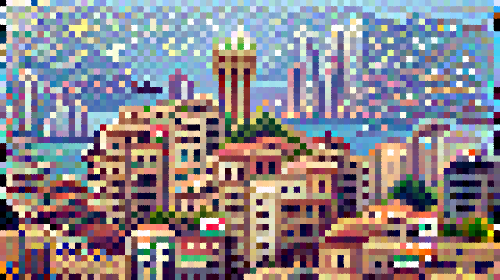

In [2]:
#@title Settings

#@markdown Enter a description of what you want to draw - I usually add #pixelart to the prompt.
#@markdown If PixelDraw is not used, it will use VQGAN instead.
#@markdown <br>

prompts = "Beirut Skyline. #pixelart" #@param {type:"string"}

aspect = "widescreen" #@param ["widescreen", "square"]

use_pixeldraw = True #@param {type:"boolean"}

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and start generating images below.

#@markdown When that is done you can change these
#@markdown settings and see if you get different results. Or if you get
#@markdown impatient, just select "Runtime -> Interrupt Execution".
#@markdown Note that the first time you run it may take a bit longer
#@markdown as nessary files are downloaded.


#@markdown
#@markdown *Advanced: you can also edit this cell and add add additional
#@markdown settings, combining settings from different notebooks.*


# Simple setup
import clipit

# these are good settings for pixeldraw
clipit.reset_settings()
clipit.add_settings(prompts=prompts, aspect=aspect)
clipit.add_settings(quality="better", scale=2.5)
clipit.add_settings(use_pixeldraw=use_pixeldraw)

#### YOU CAN ADD YOUR OWN CUSTOM SETTING HERE ####
# this is the example of how to run longer with less frequent display
# clipit.add_settings(iterations=500, display_every=50)

settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)
